In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy
import tensorflow as tf

In [101]:
hs = pd.read_csv('hatespeech.csv', encoding="ISO-8859-1",index_col=6, keep_default_na=False)
#print(hs.head())

orig = pd.read_csv('NAACL_SRW_2016.csv', index_col=0, header=None)
orig.index.name = 'ID'
orig = orig.rename(columns={1: 'Class'})
orig.index = orig.index.astype(str)
#print(orig.head())

#merging the two dataframes
hs = pd.merge(hs, orig, how='inner', left_index=True, right_index=True)
#print(hs.head())
df = hs

In [79]:
df.head()

,Unnamed: 0,Authors,Descriptions,Favorite Count,Follower Count,Hashtags,Locations,Time Tweeted,Tweets,User Mentions,Class
ID,,,,,,,,,,,
319399851215433729,2004,CreatrixKali,Literary Creatrix for Alternative SpiritMag. C...,0,169,"[{'text': 'MKR', 'indices': [37, 41]}]",Australia,2013-04-03 10:43:53,Oh yeah Colin! Smash those girls! :D #MKR,[],sexism
320817818222358529,5148,quincepoacher,"AKA Queenotisblue. Sociology, politics, policy...",0,425,"[{'text': 'MKR', 'indices': [68, 72]}]",Melbourne,2013-04-07 08:38:23,It's insane they keep bringing people back. Wh...,[],none
324114200450437120,5167,MarkTramby,"Mad keen Manly Sea Eagles supporter, love red ...",0,330,"[{'text': 'MKR', 'indices': [16, 20]}, {'text'...",Brisbane,2013-04-16 10:57:01,@berkeley_eagle #MKR this shit show has more ...,"[{'screen_name': 'berkeley_eagle', 'name': 'jo...",none
326286656854454273,5221,BinnyD,Reclusive nillionaire Whovian who enjoys telev...,0,211,"[{'text': 'MKR', 'indices': [18, 22]}]","NSW, Australia",2013-04-22 10:49:35,*sigh* oh Colin ? #MKR,[],none
381988216292655104,3612,YesYoureSexist,Inspired by @YesYoureRacist.,0,24041,[],,2013-09-23 03:47:42,"RT @brian_day15: I swear, I'm not sexist, but ...","[{'screen_name': 'brian_day15', 'name': 'Brian...",sexism


In [97]:
df = pd.read_csv("hatespeech_processed.csv")

In [17]:
df.head(10)

,ID,data,label
0,319399851215433729,oh yeah colin smash girls,sexism
1,320817818222358529,insane keep bringing people back show end,none
2,324114200450437120,eagle shit show comebacks johnny farnham ok back,none
3,326286656854454273,sigh oh colin,none
4,381988216292655104,rt day15 swear sexist honestly cannot stand wo...,sexism
5,381989167564996609,science good says men monogamous shit amirite,none
6,381989237072990208,rt call sexist think women seriously lacking k...,sexism
7,381989256404533251,rt call sexist females really need stop acting...,sexism
8,381989513691529216,rt mine place woman work call sexist woman roc...,sexism
9,382350557957984256,rt naija call sexist last tweet women want equ...,sexism


In [46]:
df_none = df[df.label=='none']
df_sexism = df[df.label=='sexism']
df_racism = df[df.label=='racism']

In [38]:
x = ' '.join(df_none['data']).lower().split()

TypeError: sequence item 52: expected str instance, float found

In [50]:
pd.Series(' '.join(df_racism['data']).lower().split()).value_counts()[:100]


islam         516
muslims       355
muslim        233
one           215
mohammed      201
rt            180
hundred       144
religion      144
isis          131
jews          131
prophet       130
like          124
people        124
quran         124
women          96
war            91
murder         88
years          87
thousand,      86
fairooz        78
four           78
world          75
want           65
christians     61
every          60
nothing        59
hatred         58
would          58
humanity       58
slavery        56
             ... 
girls          31
daesh          31
old            30
amp            30
even           30
microbrain     29
still          29
follow         29
us             29
go             29
hindus         28
violence       28
freedom        28
christian      27
understand     27
hamas          27
million        26
problem        26
jihad          26
kill           26
sexist         26
many           26
tell           26
propaganda     26
trying    

In [53]:
x = ' '.join(df_sexism['data']).lower()


In [58]:
x = x.replace("rt",'')

In [47]:
df_none = df_none.applymap(str)


In [48]:
df_none = df_none.applymap(str)
df_racism = df_racism.applymap(str)
df_sexism = df_sexism.applymap(str)

In [49]:
df_racism = df_racism.applymap(str)

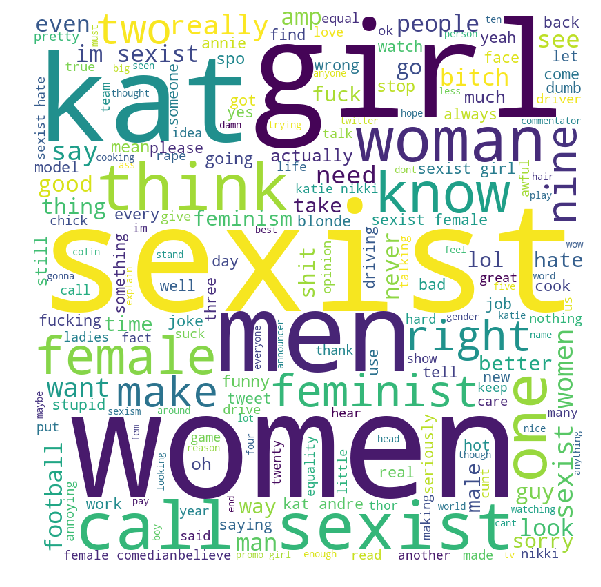

In [59]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(x) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [62]:
y = ' '.join(df_racism['data']).lower()
y = y.replace("rt",'')

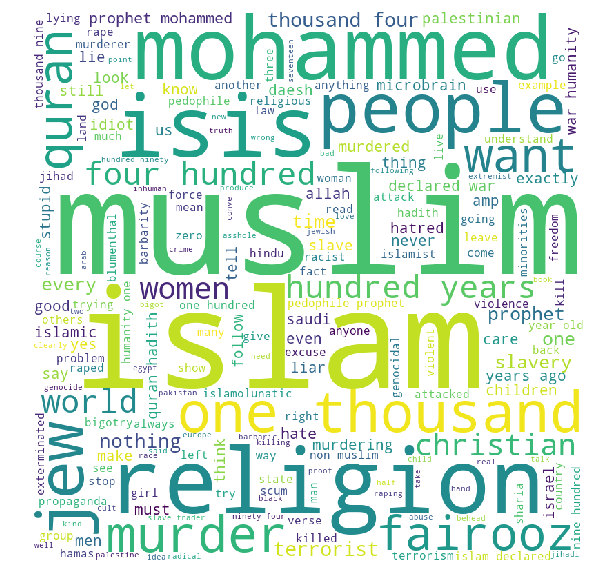

In [63]:

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(y) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [74]:
var = 0
count = 0

In [75]:

def avg_cal(sentence):
    global var
    global count
    filtered = ''.join(filter(lambda x: x not in '".,;!-', sentence))
    words = [word for word in filtered.split() if word]
    avg = sum(map(len, words))/len(words)
    var= var+ len(words)
    count+=1
df_none['data'].apply(lambda x: avg_cal(x))
print(var/count)

7.073959938366718


In [76]:
var, count = 0,0 
df_sexism['data'].apply(lambda x: avg_cal(x))
print(var/count)

8.319229554783707


In [77]:
var, count = 0,0 
df_racism['data'].apply(lambda x: avg_cal(x))
print(var/count)

8.95452196382429


In [83]:
df_none = df[df.Class=='none']
df_sexism = df[df.Class=='sexism']
df_racism = df[df.Class=='racism']

df_none['Tweets'].apply(lambda x: avg_cal(x))
print(var/count)

var, count = 0,0 
df_sexism['Tweets'].apply(lambda x: avg_cal(x))
print(var/count)

var, count = 0,0 
df_racism['Tweets'].apply(lambda x: avg_cal(x))
print(var/count)

12.322023442319557
16.67382380802021
18.118346253229973


In [103]:
df['total_length'] = df['Tweets'].apply(len)
df['capitals'] = df['Tweets'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)
df['num_exclamation_marks'] = df['Tweets'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['Tweets'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['Tweets'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['Tweets'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['Tweets'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['Tweets'].apply(lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

In [ ]:
df['total_length'] = df['label'].apply(len)
df['capitals'] = df['label'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)
df['num_exclamation_marks'] = df['label'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['label'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['label'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['label'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['label'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['label'].apply(lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

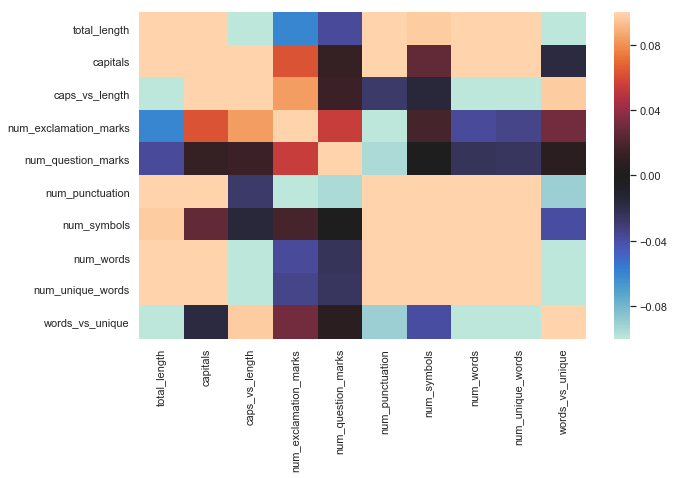

In [104]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)
ax = sns.heatmap(df.corr(), vmin=-0.1, vmax=0.1, center=0.0)

In [92]:
val = df.corr()

In [95]:
val.shape

(10, 10)